<a href="https://colab.research.google.com/github/Nutsima-kmk/Nutsima.portfolio/blob/main/Travel_Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')

In [15]:
df = pd.read_csv('Travel details dataset.csv',index_col='Trip ID')
print(df)

                    Destination Start date   End date  Duration (days)  \
Trip ID                                                                  
1                    London, UK   5/1/2023   5/8/2023              7.0   
2              Phuket, Thailand  6/15/2023  6/20/2023              5.0   
3               Bali, Indonesia   7/1/2023   7/8/2023              7.0   
4                 New York, USA  8/15/2023  8/29/2023             14.0   
5                  Tokyo, Japan  9/10/2023  9/17/2023              7.0   
...                         ...        ...        ...              ...   
135      Rio de Janeiro, Brazil   8/1/2023  8/10/2023              9.0   
136           Vancouver, Canada  8/15/2023  8/21/2023              6.0   
137           Bangkok, Thailand   9/1/2023   9/8/2023              7.0   
138            Barcelona, Spain  9/15/2023  9/22/2023              7.0   
139       Auckland, New Zealand  10/1/2023  10/8/2023              7.0   

           Traveler name  Traveler ag

In [16]:
df.shape

(139, 12)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1 to 139
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Destination           137 non-null    object 
 1   Start date            137 non-null    object 
 2   End date              137 non-null    object 
 3   Duration (days)       137 non-null    float64
 4   Traveler name         137 non-null    object 
 5   Traveler age          137 non-null    float64
 6   Traveler gender       137 non-null    object 
 7   Traveler nationality  137 non-null    object 
 8   Accommodation type    137 non-null    object 
 9   Accommodation cost    137 non-null    object 
 10  Transportation type   136 non-null    object 
 11  Transportation cost   136 non-null    object 
dtypes: float64(2), object(10)
memory usage: 14.1+ KB


In [18]:
# Rename data cols.
df.rename(columns={'Start date':'Start','End date':'End','Duration (days)':'Duration','Traveler name':'name','Traveler age':'age','Traveler gender':'gender','Traveler nationality':'nationality'},inplace=True)
df.head()

,Destination,Start,End,Duration,name,age,gender,nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
Trip ID,,,,,,,,,,,,
1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200


In [19]:
df.dropna(inplace=True) # removes rows that contains NULL values.
# (Optional) inplace= True ;the removing is done on the current DataFrame.

In [20]:
df.shape # Delete 3 rows of Null data

(136, 12)

#Data Cleaning


In [21]:
# Change Dtype from object to datetime
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])
# Change Accomodation cost & Trans cost Dtype from object to int
# Change (Replace) Data to the same format
df['Accommodation cost'] = df['Accommodation cost'].str.replace(',','').str.replace('$','').str.replace(' USD','').astype(int)
df['Transportation cost'] = df['Transportation cost'].str.replace(',','').str.replace('$','').str.replace(' USD','').astype(int)
df['Transportation type'] = df['Transportation type'].replace({'Flight':'Plane','Airplane':'Plane'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 1 to 139
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Destination          136 non-null    object        
 1   Start                136 non-null    datetime64[ns]
 2   End                  136 non-null    datetime64[ns]
 3   Duration             136 non-null    float64       
 4   name                 136 non-null    object        
 5   age                  136 non-null    float64       
 6   gender               136 non-null    object        
 7   nationality          136 non-null    object        
 8   Accommodation type   136 non-null    object        
 9   Accommodation cost   136 non-null    int64         
 10  Transportation type  136 non-null    object        
 11  Transportation cost  136 non-null    int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 13.8+ KB


In [22]:
city_country = {'Paris':'France','Bali':'Indonesia','Tokyo':'Japan','Sydney':'Australia','Rome':'Italy',
                'New York':'USA','Rio de Janeiro':'Brazil','Bangkok':'Thailand','Cancun':'Mexico','Barcelona':'Spain',
                'London':'UK','Vancouver':'Canada','Cape Town':'South Africa','Dubai':'United Arab Emirates',
                'Amsterdam':'Netherlands','Seoul':'South Korea','Los Angeles':'USA','Phuket':'Thailand','Auckland':'New Zealand',
                'Santorini':'Greece','Athens':'Greece','Phnom Penh':'Cambodia','Honolulu':'Hawaii','Berlin':'Germany',
                'Marrakech':'Morocco','Edinburgh':'Scotland'}

In [23]:
# Create NEW dataframe 'dest' from 'Destination', make 2 cols by split using ', '
dest = pd.DataFrame(df.Destination.str.split(', ').values.tolist(),columns=['city','country']).head(30)

dest.loc[dest['country'].isna() & dest['city'].isin(city_country.values()),'country'] = dest.loc[dest['country'].isna() & dest['city'].isin(city_country.values()),'city']
dest.loc[dest['city'].isin(city_country.values()),'city'] = None
dest.loc[dest['country'].isna(),'country']= dest.loc[dest['country'].isna(),'city'].map(city_country)
dest.loc[dest['city'].isna(),'city']= dest.loc[dest['city'].isna(),'country'].map({v:k for k,v in city_country.items()})
dest

,city,country
0,London,UK
1,Phuket,Thailand
2,Bali,Indonesia
3,New York,USA
4,Tokyo,Japan
5,Paris,France
6,Sydney,Australia
7,Rio de Janeiro,Brazil
8,Amsterdam,Netherlands
9,Dubai,United Arab Emirates


# TOP 10 the most visited country

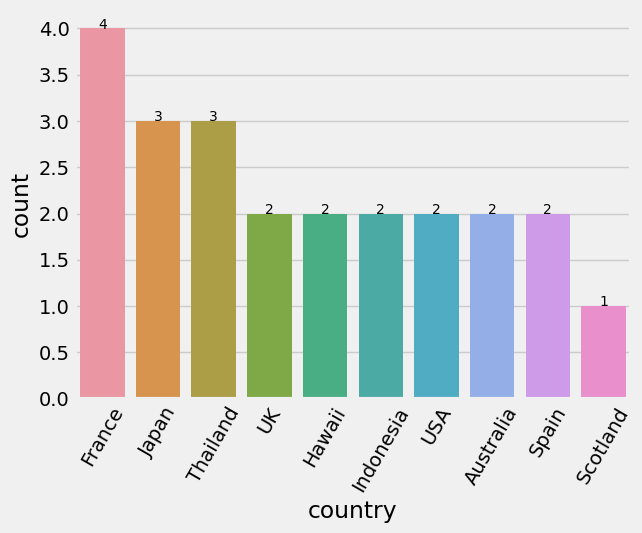

In [24]:
top10_country = dest.country.value_counts().reset_index().rename(columns={'index':'country','country':'count'}).head(10)
g = sns.barplot(data=top10_country,x='country',y='count')
for v in top10_country.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count,s=str(v.count), size=10, ha="center")
plt.xticks(rotation=60)
plt.show()

# Categorical Variables Analysis

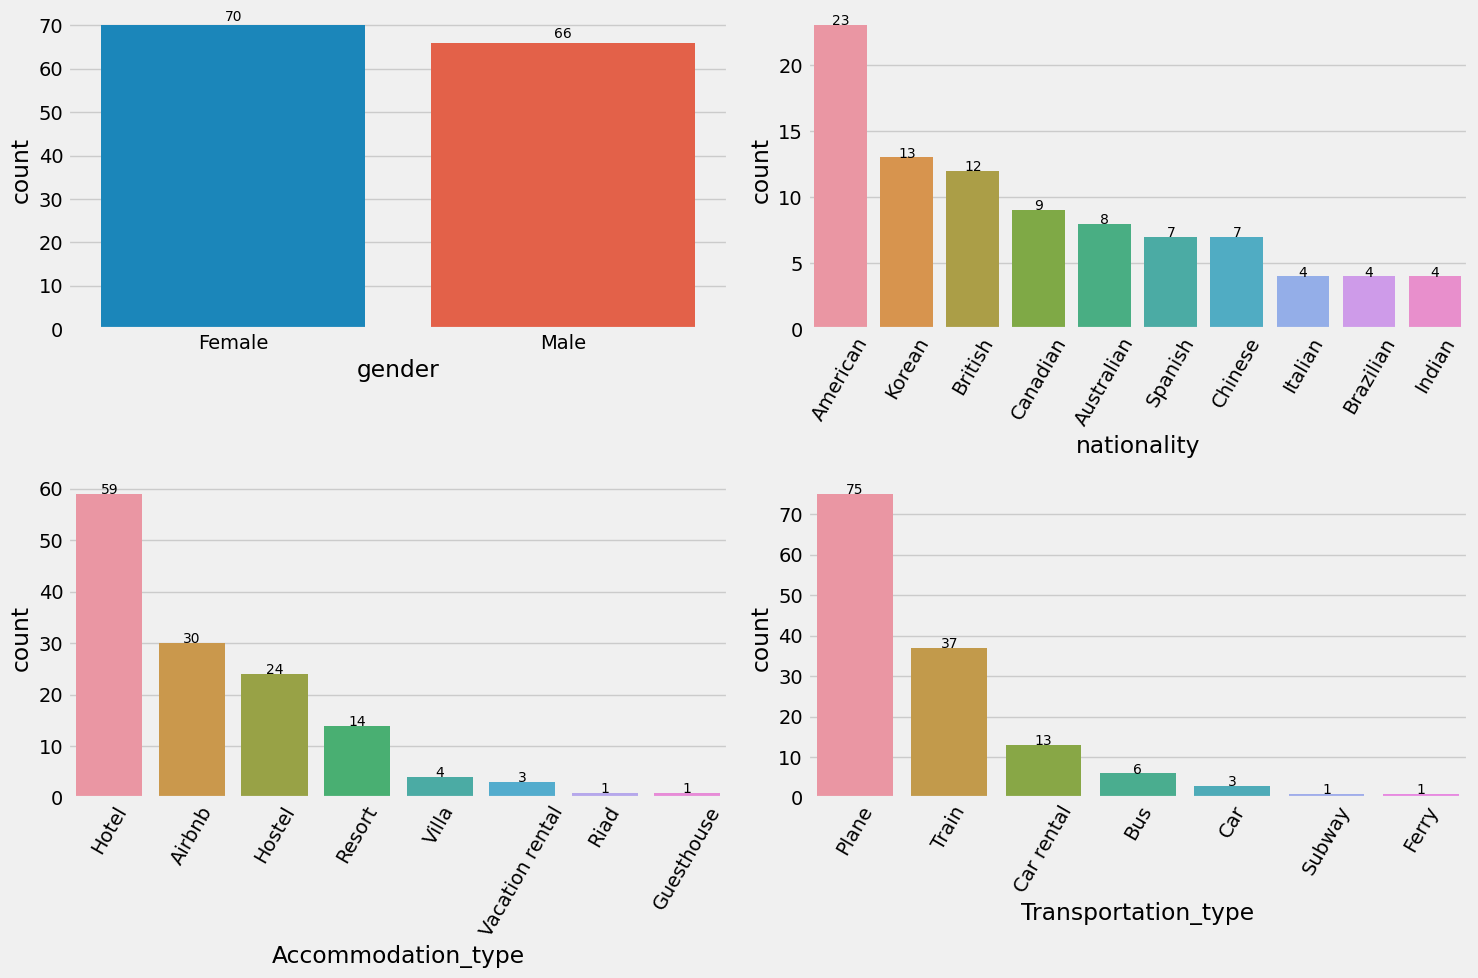

In [25]:
gender = df.gender.value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})
nationality = df.nationality.value_counts().reset_index().rename(columns={'index':'nationality','nationality':'count'}).head(10)
acc_type = df['Accommodation type'].value_counts().reset_index().rename(columns={'index':'Accommodation_type','Accommodation type':'count'})
trans_type = df['Transportation type'].value_counts().reset_index().rename(columns={'index':'Transportation_type','Transportation type':'count'})

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
g = sns.barplot(data=gender,x='gender',y='count')
for v in gender.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count+1,s=str(v.count), size=10, ha="center")

plt.subplot(2,2,2)
g = sns.barplot(data=nationality,x='nationality',y='count')
for v in nationality.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count,s=str(v.count), size=10, ha="center")
plt.xticks(rotation=60)

plt.subplot(2,2,3)
g = sns.barplot(data=acc_type,x='Accommodation_type',y='count')
for v in acc_type.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count,s=str(v.count), size=10, ha="center")
plt.xticks(rotation=60)

plt.subplot(2,2,4)
g = sns.barplot(data=trans_type,x='Transportation_type',y='count')
for v in trans_type.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count,s=str(v.count), size=10, ha="center")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

#Avg of traveler paid for Acommodation


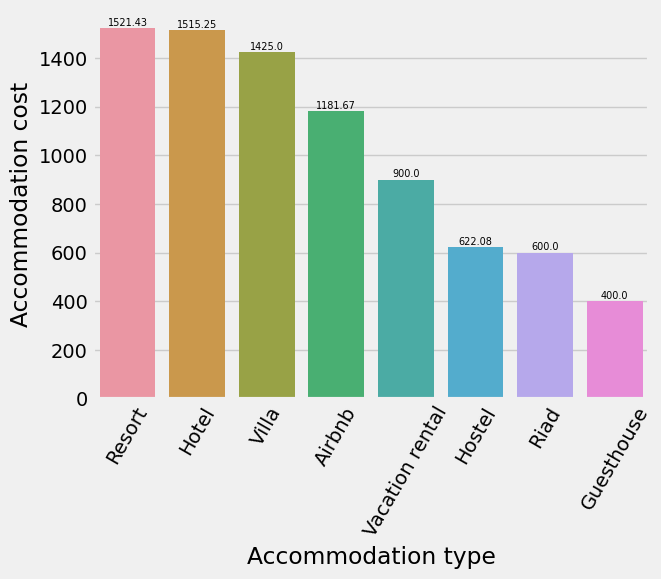

In [26]:
#Avg of traveler paid for Acommodation
acc_type_cost = round(df.groupby('Accommodation type')['Accommodation cost'].mean().reset_index().sort_values('Accommodation cost',ascending=False).reset_index(drop=True),2)
g = sns.barplot(data=acc_type_cost,x='Accommodation type',y='Accommodation cost')
for v in acc_type_cost.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._2+10,s=str(v._2), size=7, ha="center")
plt.xticks(rotation=60)
plt.show()

#Range of Traveler ages group by gender

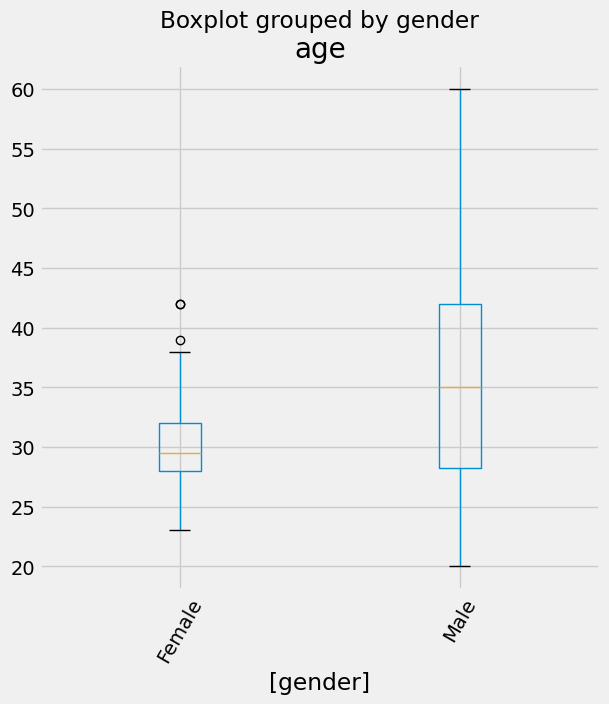

In [27]:
df.boxplot(column=['age'], by=['gender'], figsize=[7,7])
sns.set_style("whitegrid")
plt.xticks(rotation=60)
plt.show()
# Summary : Male traveler have more a wide range of ages, AVG ages = 35 years old
# Female AVG ages = 29 years old

#Percentage of Transportation type by using Pie chart

<Axes: ylabel='Transportation type'>

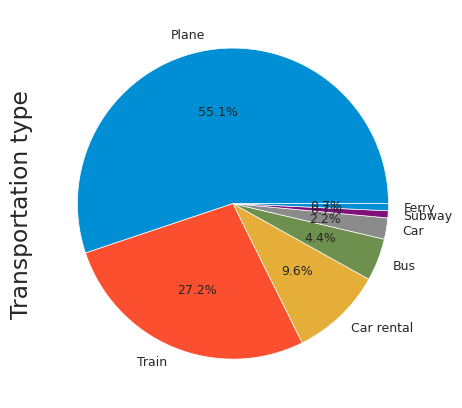

In [28]:
trans_type2 = df['Transportation type'].value_counts()
trans_type2 .plot(kind='pie', textprops={'fontsize': 9}, autopct='%.1f%%')

# Distribution of trip duration, customer age, Accommodation cost and Transportation cost

<Axes: xlabel='Transportation cost', ylabel='Density'>

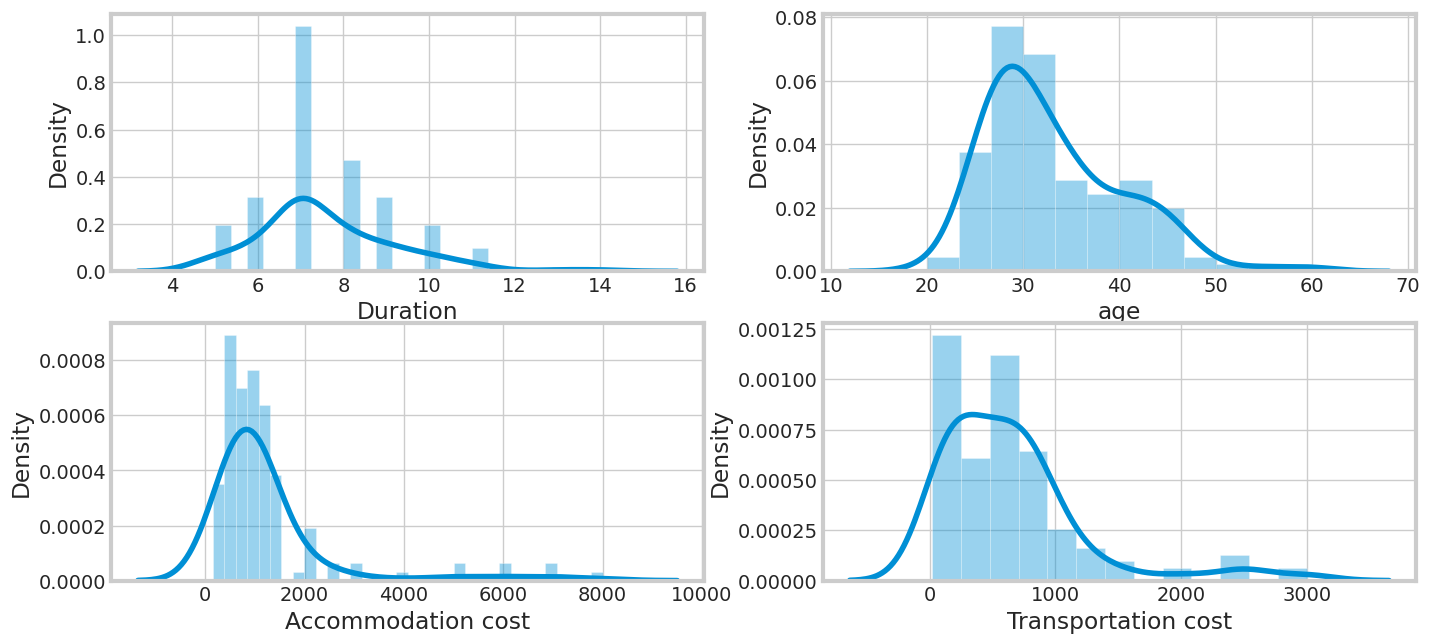

In [29]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.distplot(df['Duration'])
plt.subplot(2,2,2)
sns.distplot(df['age'])
plt.subplot(2,2,3)
sns.distplot(df['Accommodation cost'])
plt.subplot(2,2,4)
sns.distplot(df['Transportation cost'])